In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Part1

### (a).

In [311]:
class rr:
    def __init__(self, lambda_1) -> None:
        self.lambda_1 = lambda_1
    

    def fit(self, X, y):
        self.n, self.m = X.shape
        self.U, S, self.Vh = np.linalg.svd(X, full_matrices=False)
        self.V = self.Vh.T
        self.S = S/(S**2+self.lambda_1)
        self.S_lamda = np.diag(self.S)
        self.W = self.V.dot(self.S_lamda).dot(self.U.T).dot(y)
    
    def predict(self, X):
        return X.dot(self.W)
    
    def get_weight(self):
        return self.W
    
    def get_df(self):
        return sum(sum(self.S_lamda))


In [312]:
X_train = pd.read_csv("X_train.csv", header=None)
y_train = pd.read_csv("y_train.csv", header=None)
X_test = pd.read_csv("X_test.csv", header=None)
y_test = pd.read_csv("y_test.csv", header=None)

In [313]:
# y_predict = rr_model.predict(X_test)

df = []
weight = pd.DataFrame()
for i in range(5000):
    rr_model = rr(i)
    rr_model.fit(X_train, y_train)
    weight = pd.concat([weight, pd.DataFrame(rr_model.get_weight().T)], axis = 0, ignore_index=True)
    df.append(rr_model.get_df())
    
weight.columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year_made', 'bias']

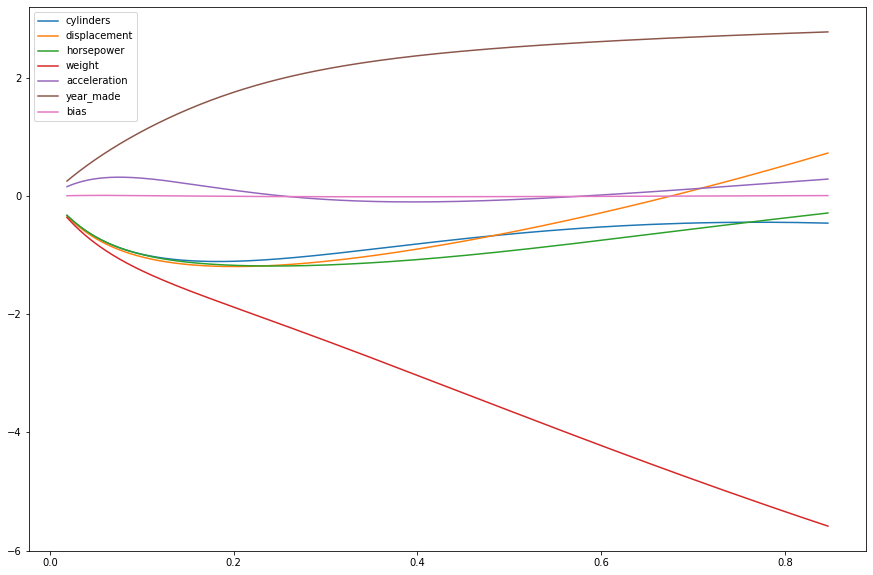

In [314]:
plt.figure(figsize=(15,10))
for column in weight.columns:
    plt.plot(df, weight[column], label = column)
plt.legend()
plt.show()

### (b).

####  year_made and weight stand out of others because they have higher weights which means they matters more when deciding y.

### (c).

#### According to the graph below, we should choose lambda=0 in this situation and least squares should be chosen.

In [315]:
def RMSE(y, y_pred):
    return np.sqrt(np.mean((y-y_pred)**2))

In [316]:
rmse_list = []
for i in range(50):
    rr_model = rr(i)
    rr_model.fit(X_train, y_train)
    rmse = RMSE(y_test, rr_model.predict(X_test))[0]
    rmse_list.append(rmse)


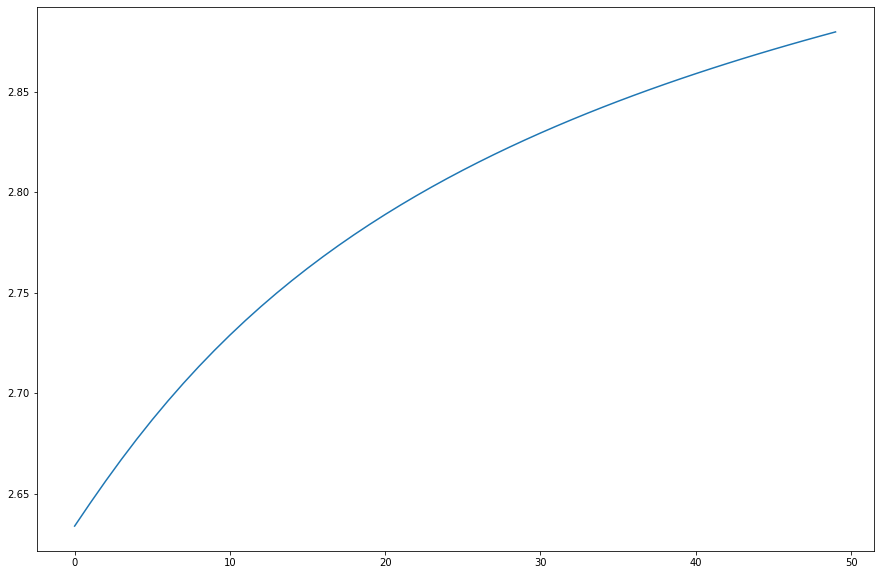

In [317]:
plt.figure(figsize=(15,10))
plt.plot(range(50),rmse_list)

### (d).

#### When degree = 2, we should choose lambda = 49. When degree = 3, we should choose lambda = 51. Because lambda with these values, model reaches the minimum RMSE. When the degree increases which means that the dimension of training set increases, more lambda or limitation of the weight of those parameters should be implemented.

In [319]:
class pr:
    def __init__(self, lambda_1, degree) -> None:
        self.lambda_1 = lambda_1
        self.degree = degree


    def x_poly_train(self, X):
        X = X.to_numpy()
        self.mean = []
        self.std = []
        for i in range(2, self.degree+1):
            self.mean.append(np.mean(X[: , :6]**i, axis=0))
            self.std.append(np.std(X[: , :6]**i, axis=0))
            X_temp = ((X[: , :6]**i)-self.mean[i-2])/self.std[i-2]
            X = np.hstack((X, X_temp))
        return X
    
    def x_ploly_test(self, X):
        X = X.to_numpy()
        for i in range(2, self.degree+1):
            X_temp = ((X[: , :6]**i)-self.mean[i-2])/self.std[i-2]
            X = np.hstack((X, X_temp))
        return X

    def fit(self, X, y):
        X = self.x_poly_train(X)
        self.n, self.m = X.shape
        self.U, S, self.Vh = np.linalg.svd(X, full_matrices=False)
        self.V = self.Vh.T
        self.S = S/(S**2+self.lambda_1)
        self.S_lamda = np.diag(self.S)
        self.W = self.V.dot(self.S_lamda).dot(self.U.T).dot(y)
    
    def predict(self, X):
        X = self.x_ploly_test(X)
        return X.dot(self.W)
    
    def get_weight(self):
        return self.W
    
    def get_df(self):
        return sum(sum(self.S_lamda))

In [320]:
df = []
weight = pd.DataFrame()
for i in range(5000):
    pr_model = pr(i, 2)
    pr_model.fit(X_train, y_train)
    weight = pd.concat([weight, pd.DataFrame(pr_model.get_weight().T)], axis = 0, ignore_index=True)
    df.append(pr_model.get_df())
    
# weight.columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year_made', 'bias']

In [321]:
rmse_list_1 = []
rmse_list_2 = []
rmse_list_3 = []

for dg in range(1,4):
    for i in range(100):
        pr_model = pr(i, dg)
        pr_model.fit(X_train, y_train)
        rmse = RMSE(y_test, pr_model.predict(X_test))[0]
        if dg == 1:
            rmse_list_1.append(rmse)
        if dg == 2:
            rmse_list_2.append(rmse)
        if dg == 3:
            rmse_list_3.append(rmse)

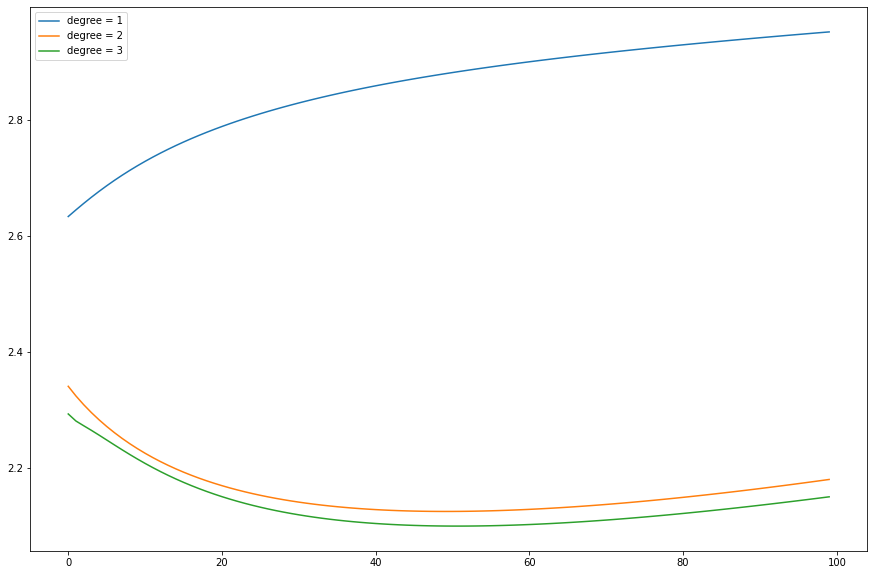

In [322]:
plt.figure(figsize=(15,10))
plt.plot(range(100),rmse_list_1, label = 'degree = 1')
plt.plot(range(100),rmse_list_2, label = 'degree = 2')
plt.plot(range(100),rmse_list_3, label = 'degree = 3')
plt.legend()

In [330]:
print('degree1: ', rmse_list_1.index(min(rmse_list_1)))
print('degree2: ', rmse_list_2.index(min(rmse_list_2)))
print('degree3: ', rmse_list_3.index(min(rmse_list_3)))

degree1:  0
degree2:  49
degree3:  51
